# Boolean Indexing with Numpy

We'll be analyzing taxi trip data released by the city of New York.

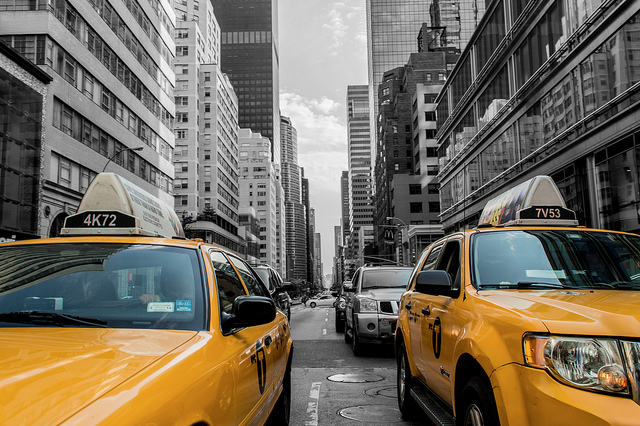

In [3]:
from IPython.display import Image
Image(filename='nyc_taxi.jpg') 

We'll be working with a subset of this data: Yellow taxi trips to and from New York City airports between January and June 2016. In our dataset, each row represents a unique taxi trip. Below is information about selected columns from the data set:

- `pickup_year` - The year of the trip.
- `pickup_month` - The month of the trip (January is 1, December is 12).
- `pickup_day` - The day of the month of the trip.
- `pickup_location_code` - The airport or borough where the the trip started, as one of eight categories:<br>
 * 0 - Bronx.<br>
 * 01 - Brooklyn.<br>
 * 02 - JFK Airport.<br>
 * 03 - LaGuardia Airport.<br>
 * 04 - Manhattan.<br>
 * 05 - Newark Airport.<br>
 * 06 - Queens.<br>
 * 07 - Staten Island.
- `dropoff_location_code` - The airport or borough where the the trip finished, using the same eight category codes as pickup_location_code.
- `trip_distance` - The distance of the trip in miles.
- `trip_length` - The length of the trip in seconds.
- `fare_amount` - The base fare of the trip, in dollars.
- `total_amount` - The total amount charged to the passenger, including all fees, tolls and tips.

In [1]:
import numpy as np

In [3]:
# The numpy.genfromtxt() function reads a text file into a NumPy ndarray.
# np.genfromtxt(filename,delimiter)
taxi = np.genfromtxt('nyc_taxis.csv',delimiter=',',skip_header=1)
taxi

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 1.165e+01, 6.999e+01,
        1.000e+00],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 8.000e+00, 5.430e+01,
        1.000e+00],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 3.780e+01,
        2.000e+00],
       ...,
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 5.000e+00, 6.334e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 8.950e+00, 4.475e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 0.000e+00, 5.484e+01,
        2.000e+00]])

In [7]:
# Boolean operation on narray
a = np.array([1, 2, 3, 4, 5])
b = np.array(["blue", "blue", "red", "blue"])
c = np.array([80.0, 103.4, 96.9, 200.3])

a_bool = a < 3
print(a_bool)
b_bool = b == 'blue'
print(b_bool)
c_bool = c > 100
print(c_bool)

[ True  True False False False]
[ True  True False  True]
[False  True False  True]


In [ ]:
# index using boolean arrays
